# Visualizing Black Histories in California
April 27, 2022
<img src="images/map1.png">

## Mapping in Python

<img src="https://geopandas.org/en/stable/_static/geopandas_logo_web.svg" width=600>

We start by importing a new module `geopandas`. This is a pretty high level geospatial library, widely used by spatial data scientists all over the world. Don't worry about it too much for now, but know that it allows us to import a variety of spatial data formats, and plot them on a map.

* [geopandas documentation](https://geopandas.readthedocs.io/en/latest/gallery/index.html)

## Finding spatial data

<img src="https://carto.com/img/definitions/spatial-analysis-languages.2906f68c.png" width=600>

Spatial data comes in many forms. Most popular are:
- [Shapefiles](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm)
- [geojson](https://en.wikipedia.org/wiki/GeoJSON)
  - [geojson.io](https://geojson.io/)
- csv files with latitude longitude columns

## Using geopandas

1. `import` geopandas and give it an alias `gpd`
1. use `read_file` to bring spatial data to your notebook
1. use `plot` to visualize

In [7]:
# import geopandas
import geopandas as gpd
plot (gpd)


NameError: name 'read_file' is not defined

## Loading data

<img src="https://oehha.ca.gov/sites/default/files/media/files/images/logo/calenviroscreenlogosmaller.png">

Let's find some data to bring in.

- https://oehha.ca.gov/calenviroscreen
- [About the data](https://oehha.ca.gov/calenviroscreen/maps-data/download-data)

In [8]:
# load spatial data into a variable "cal"
cal = gpd.read_file('data/calenviroscreen40shpf2021shp.zip')

Once the data is loaded, you can visualize it: `.plot`

<AxesSubplot:>

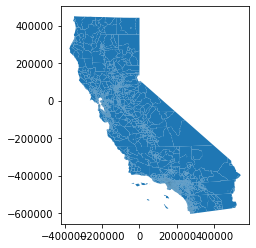

In [9]:
# map it
cal.plot()

Let's make the map bigger by adding an argument: `figsize`

<AxesSubplot:>

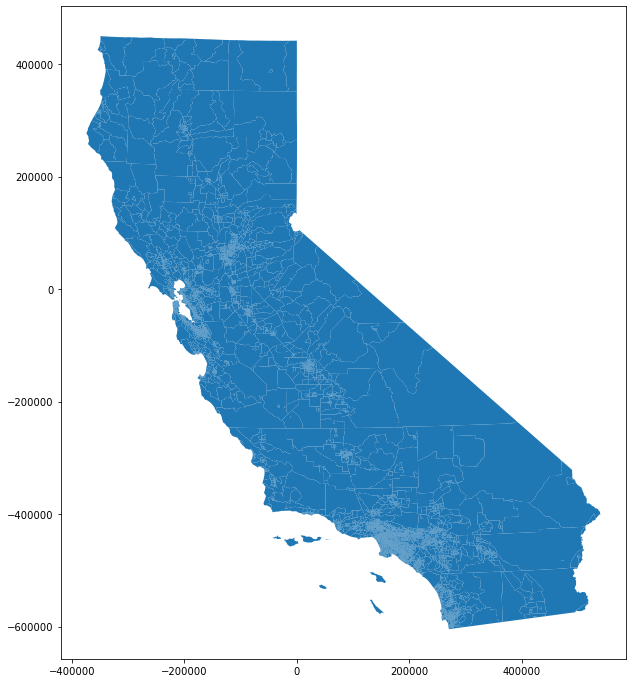

In [10]:
# map it, but larger
cal.plot(figsize=(12,12))

## Data view

Map layers (shapefiles, geojson files, etc) come with "attribute" data. You can look at the data through pandas commands.

First, look at the data fields available: `.info`

In [11]:
# show info about the data
cal.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Tract       8035 non-null   float64 
 1   ZIP         8035 non-null   int64   
 2   County      8035 non-null   object  
 3   ApproxLoc   8035 non-null   object  
 4   TotPop19    8035 non-null   int64   
 5   CIscore     8035 non-null   float64 
 6   CIscoreP    8035 non-null   float64 
 7   Ozone       8035 non-null   float64 
 8   OzoneP      8035 non-null   float64 
 9   PM2_5       8035 non-null   float64 
 10  PM2_5_P     8035 non-null   float64 
 11  DieselPM    8035 non-null   float64 
 12  DieselPM_P  8035 non-null   float64 
 13  Pesticide   8035 non-null   float64 
 14  PesticideP  8035 non-null   float64 
 15  Tox_Rel     8035 non-null   float64 
 16  Tox_Rel_P   8035 non-null   float64 
 17  Traffic     8035 non-null   float64 
 18  TrafficP    8035 non-null   float64 
 19

In [17]:
# look at the first 5 rows using .head
cal.head
()

()

In [14]:
# look at the last 5 rows using .tail
cal.tail

<bound method NDFrame.tail of              Tract    ZIP         County     ApproxLoc  TotPop19    CIscore  \
0     6.083002e+09  93454  Santa Barbara   Santa Maria      4495  36.019653   
1     6.083002e+09  93455  Santa Barbara   Santa Maria     13173  37.030667   
2     6.083002e+09  93454  Santa Barbara   Santa Maria      2398  31.213140   
3     6.083002e+09  93455  Santa Barbara        Orcutt      4496   6.639331   
4     6.083002e+09  93455  Santa Barbara        Orcutt      4008  14.022852   
...            ...    ...            ...           ...       ...        ...   
8030  6.037430e+09  91016    Los Angeles      Monrovia      5339  17.124832   
8031  6.037431e+09  91007    Los Angeles       Arcadia      4365  13.841990   
8032  6.037431e+09  91016    Los Angeles      Monrovia      6758  39.697849   
8033  6.037534e+09  90201    Los Angeles          Bell      6986  62.931044   
8034  6.037534e+09  90201    Los Angeles  Bell Gardens      2358  63.315048   

       CIscoreP     O

<AxesSubplot:>

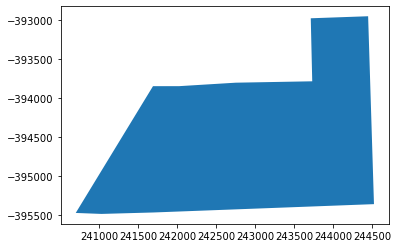

In [18]:
# look at a single random record using .sample
cal.sample().plot()


In [ ]:
# plot a single random census tract (hint: chain multiple commands!)


## Choropleth maps

<img src="https://dabrownstein.files.wordpress.com/2014/11/1861-slave-population-map.png" width=600>

- [Source: Mapping Slavery in the United States in 1860](https://dabrownstein.com/2013/02/22/mapping-slavery-in-1860/)

Otherwise known as *thematic* maps, choropleth maps are a way to visualize *polygonial* data with colors. In other words, each region is colored a certain way, based on some criteria you define.

- [geopandas examples](https://geopandas.org/en/stable/gallery/choropleths.html)

Using the `.plot` function, we can add *arguments* to make it a choropleth map.
- `column` defines which attribute you want to use to color the map
- `scheme` defines how you want the colors to be distributed
  - `quantiles`
  - `NaturalBreaks`
  - `UserDefined`
- `legend` true or false
- `cmap` choose a [color scheme](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- `k` how many bins?

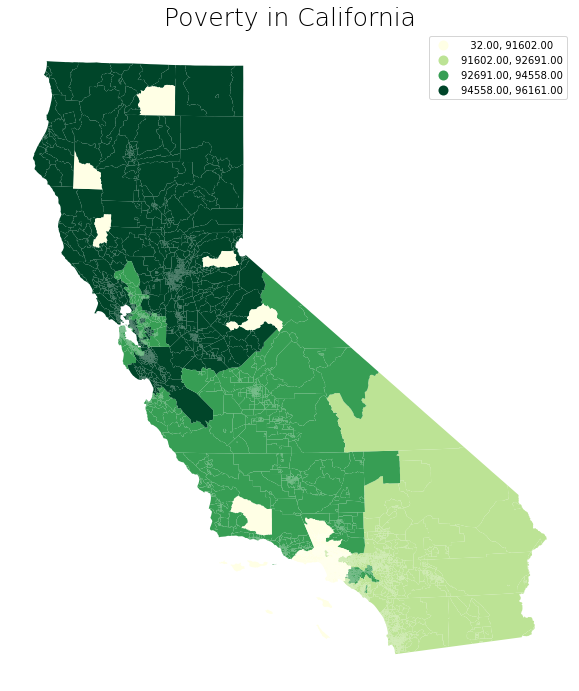

In [28]:
# create a layer from the cal enviroscreen data
layer1 = cal.plot(figsize=(12,12),
                  column='ZIP', 
                  scheme='quantiles', 
                  legend=True, 
                  cmap='YlGn',
                  k=4)

# give it a title
layer1.set_title('Poverty in California', fontdict={'fontsize': '25', 'fontweight' : '3'})

# turn the axes off
layer1.set_axis_off();

<div class="alert alert-success">
    <h2> Try this!</h2>
    In the code cell that created the map above, what happens when you do the following?
    <li>change the <code>k</code> value to 2</li>
    <li>change the <code>column</code> value to a different attribute</li>
    <li>change the <code>cmap</code> value to a different <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">color scheme</a></li>
</div>

### User defined bins

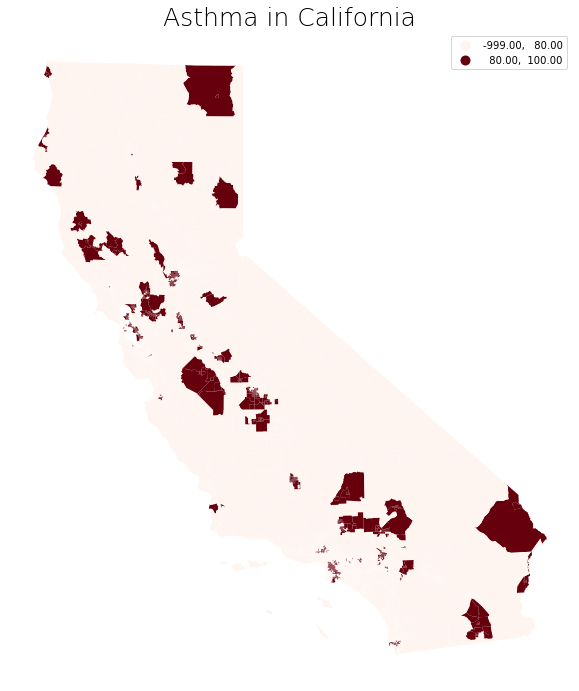

In [30]:
map = cal.plot(figsize=(12,12),
                  column='AsthmaP', 
                  legend=True, 
                  cmap='Reds', 
                  scheme='user_defined', 
                  classification_kwds={'bins':[80,100]})

# give it a title
map.set_title('Asthma in California', fontdict={'fontsize': '25', 'fontweight' : '3'})

# turn the axes off
map.set_axis_off();

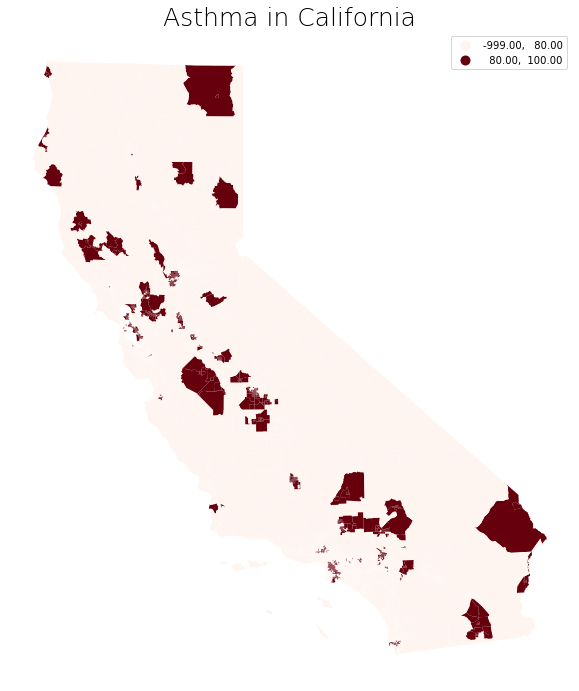

In [30]:
map = cal.plot(figsize=(12,12),
                  column='AsthmaP', 
                  legend=True, 
                  cmap='Reds', 
                  scheme='user_defined', 
                  classification_kwds={'bins':[80,100]})

# give it a title
map.set_title('Asthma in California', fontdict={'fontsize': '25', 'fontweight' : '3'})

# turn the axes off
map.set_axis_off();

# Green Book

<img src="images/gb1.png" width=800>

In [31]:
# bring in greenbook data csv file
green = gpd.read_file('data/47greenbookla.csv')

In [32]:
# convert the csv file into a "geodataframe"
green = gpd.GeoDataFrame(green, 
                         geometry=gpd.points_from_xy(green.Longitude, green.Latitude), 
                         crs="EPSG:4326")

In [33]:
green.head()

,Type,Name,Street Address,City,Latitude,Longitude,Image,NYPL,geometry
0,Hotel,Clark,"1824 Central Ave., Los Angeles, California, Un...",Los Angeles,34.049784,-118.046846,https://upload.wikimedia.org/wikipedia/commons...,https://digitalcollections.nypl.org/items/2921...,POINT (-118.04685 34.04978)
1,Hotel,Arcade,"542 Ceres Ave., Los Angeles, California, Unite...",Los Angeles,34.0405643,-118.2407291,https://upload.wikimedia.org/wikipedia/commons...,https://digitalcollections.nypl.org/items/2921...,POINT (-118.24073 34.04056)
2,Hotel,Lincoln,"549 Ceres Ave., Los Angeles, California, Unite...",Los Angeles,34.040432,-118.241163,https://upload.wikimedia.org/wikipedia/commons...,https://digitalcollections.nypl.org/items/2921...,POINT (-118.24116 34.04043)
3,Hotel,Sberidan,"1824 Central Ave., Los Angeles, California, Un...",Los Angeles,34.049784,-118.046846,https://upload.wikimedia.org/wikipedia/commons...,https://digitalcollections.nypl.org/items/2921...,POINT (-118.04685 34.04978)
4,Hotel,McAlpin,"648 Stanford Ave., Los Angeles, California, Un...",Los Angeles,34.0395808,-118.2436406,https://upload.wikimedia.org/wikipedia/commons...,https://digitalcollections.nypl.org/items/2921...,POINT (-118.24364 34.03958)


<AxesSubplot:>

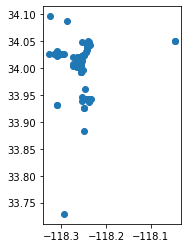

In [34]:
green.plot()

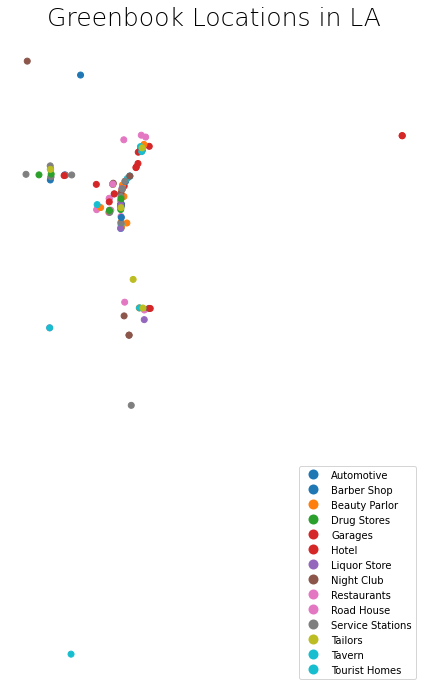

In [35]:
# bigger, styled
map = green.plot(figsize=(12,12),column='Type',legend=True)

# give it a title
map.set_title('Greenbook Locations in LA', fontdict={'fontsize': '25', 'fontweight' : '3'})

# turn the axes off
map.set_axis_off();

## Multiple layers

We have learned how to visualize single data layers. But what if we wanted to map *multiple* layers? To do so, we introduce two new libraries to our project.

- [Maplotlib](https://matplotlib.org/) allows us to create multiple plots, or multiple layers on a single plot
- [Contextily](https://contextily.readthedocs.io/en/latest/intro_guide.html) allows us to add a basemap to our map


In [36]:
import matplotlib.pyplot as plt
import contextily as cx

The syntax to create a plot with matplotlib is a bit more complicated. But get the hang of it, and you will learn how to create layered maps in no time!

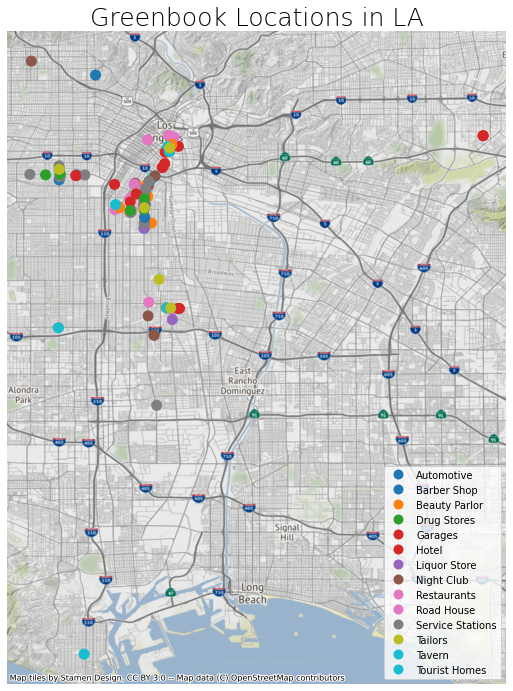

In [37]:
# set up the "subplot"
# note that "ax" is the single plot's identifier
fig, ax = plt.subplots(figsize=(12,12))

# add the 
green.plot(
            ax=ax, # add this layer to the "ax" plot
            column='Type',
            legend=True,
            markersize=100)

# give it a title
ax.set_title('Greenbook Locations in LA', fontdict={'fontsize': 25, 'fontweight' : 3})

# turn the axes off
ax.set_axis_off()

# add a basemap
cx.add_basemap(ax, crs=green.crs.to_string())

## Mapping greenbook locations with enviroscreen data

Check: are the data layers in the same projection?

In [38]:
cal.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
green.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
# project greenbook data to WGS 84
cal=cal.to_crs(4326)

In [42]:
# check the crs now
cal.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

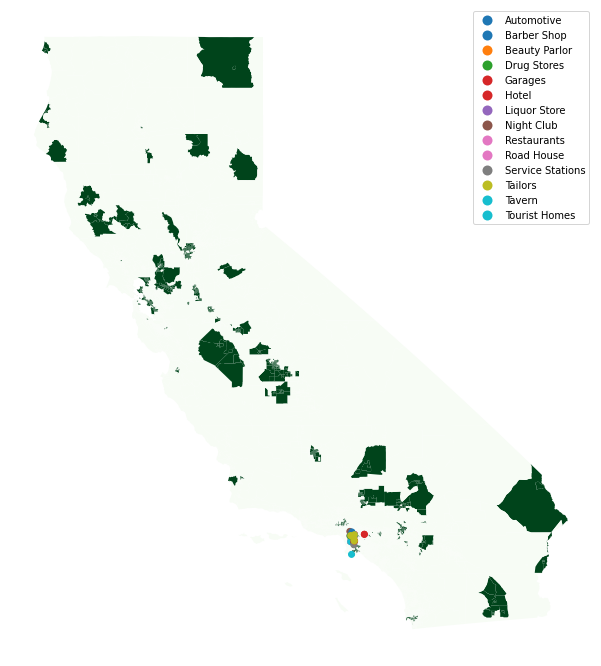

In [43]:
# set up the "subplot"
# note that "ax" is the single plot's identifier
fig, ax = plt.subplots(figsize=(12,12))

# add the enviroscreen layer
cal.plot(
            ax=ax, # this puts this layer in the "ax" plot
            column='AsthmaP', 
            legend=False, 
            cmap='Greens', 
            scheme='user_defined', 
            classification_kwds={'bins':[80,100]})

# add greenbook locations
green.plot(
            ax=ax,
            column = 'Type',
            legend=True
          )

# turn the axes off
ax.set_axis_off();

## Zoom in to a specific layer

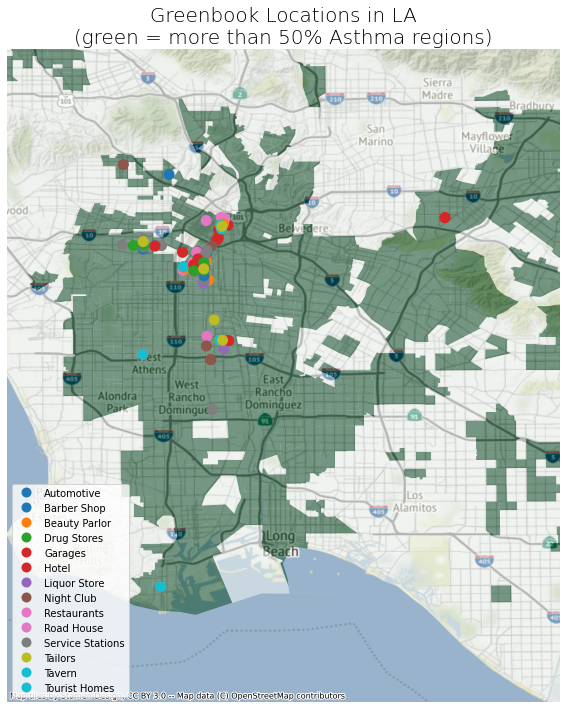

In [44]:
# set up the "subplot"
# note that "ax" is the single plot's identifier
fig, ax = plt.subplots(figsize=(12,12))

# add the enviroscreen layer
cal.plot(
          ax = ax,
          column = 'AsthmaP', 
          cmap = 'Greens', 
          scheme = 'user_defined', 
          alpha = 0.5,
          classification_kwds = {'bins':[50,100]})

# add the greenbook locations
green.plot(ax = ax,
           column = 'Type',
           markersize = 100,
           legend = True)

# get the bounding box of the greenbook data points
minx, miny, maxx, maxy = green.geometry.total_bounds

# set the extent of the map to these bounds
ax.set_xlim(minx - 0.1, maxx + 0.1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 0.1, maxy + 0.1)

# give it a title
ax.set_title('Greenbook Locations in LA\n(green = more than 50% Asthma regions)', fontdict={'fontsize': '20', 'fontweight' : '3'})

# add a basemap
cx.add_basemap(ax, crs=green.crs.to_string())

# turn the axes off
ax.set_axis_off();

# Redlining

<img src="images/red1.png" width=600>

- [Mapping Inequality Maproom by University of Richmond](https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58)
- [Downloadable data](https://dsl.richmond.edu/panorama/redlining/#loc=11/37.81/-122.369&city=oakland-ca&area=D9&adview=full&text=downloads)



### An LA example

In [45]:
red = gpd.read_file('https://dsl.richmond.edu/panorama/redlining/static/downloads/geojson/CALosAngeles1939.geojson')

In [46]:
red.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,"{'0': 'Los Angeles County', '2': '85 15', '3':...","MULTIPOLYGON (((-118.45744 34.15201, -118.4478..."
1,None,A10,A,"{'0': 'Los Angeles County', '2': '90 10', '3':...","MULTIPOLYGON (((-118.11151 34.18311, -118.1094..."
2,None,A11,A,"{'0': 'Los Angeles County', '2': '85 5', '3': ...","MULTIPOLYGON (((-118.11300 34.15985, -118.1130..."
3,None,A12,A,"{'0': 'Los Angeles County', '2': '95 ', '3': '...","MULTIPOLYGON (((-118.17123 34.12776, -118.1708..."
4,None,A13,A,"{'0': 'Los Angeles County', '2': '60 35', '3':...","MULTIPOLYGON (((-118.17458 34.14194, -118.1735..."


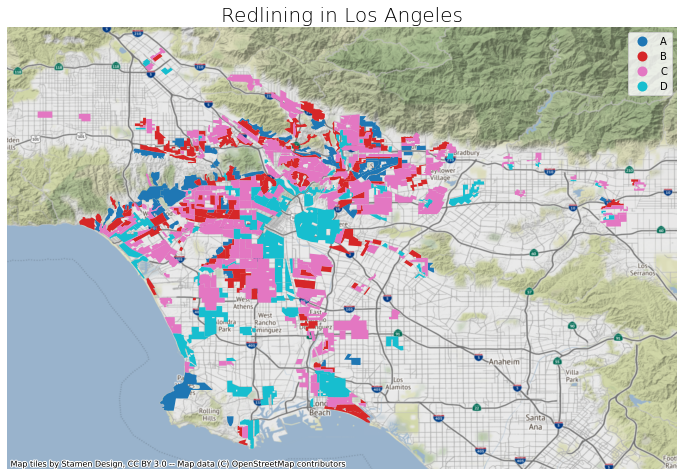

In [47]:
# set up the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the redlining data
red.plot(
        ax=ax,
        column='holc_grade',
        legend=True,
         )

# give it a title
ax.set_title('Redlining in Los Angeles', fontdict={'fontsize': '20', 'fontweight' : '3'})

# add a basemap
cx.add_basemap(ax, crs=green.crs.to_string())

# turn the axes off
ax.set_axis_off();

In [48]:
# filter data to only show where holc_grade is "D"
D = red[red['holc_grade'] == 'D']
D

,name,holc_id,holc_grade,area_description_data,geometry
345,None,D1,D,"{'0': 'Los Angeles County', '2': '90 N/A', '3'...","MULTIPOLYGON (((-118.45332 34.28239, -118.4472..."
346,None,D10,D,"{'0': 'Los Angeles County', '2': '80 20', '3':...","MULTIPOLYGON (((-118.14281 34.12559, -118.1443..."
347,None,D11,D,"{'0': 'Los Angeles County', '2': '90 10', '3':...","MULTIPOLYGON (((-118.16697 34.12035, -118.1682..."
348,None,D12,D,"{'0': 'Los Angeles County', '2': '90 10', '3':...","MULTIPOLYGON (((-118.18847 34.08801, -118.1884..."
349,None,D13,D,"{'0': 'Los Angeles County', '2': '90 N/A', '3'...","MULTIPOLYGON (((-118.08942 34.09073, -118.0893..."
...,...,...,...,...,...
411,None,D7,D,"{'0': 'Los Angeles County', '2': '90 N/A', '3'...","MULTIPOLYGON (((-118.12562 34.16699, -118.1255..."
412,None,D70,D,"{'0': 'Los Angeles County', '2': '50 50', '3':...","MULTIPOLYGON (((-118.29093 33.79762, -118.2906..."
413,None,D71,D,"{'0': 'Los Angeles County', '2': '95 ', '3': '...","MULTIPOLYGON (((-118.26136 33.77123, -118.2619..."
414,None,D8,D,"{'0': 'Los Angeles County', '2': '90 10', '3':...","MULTIPOLYGON (((-118.08671 34.15636, -118.0817..."


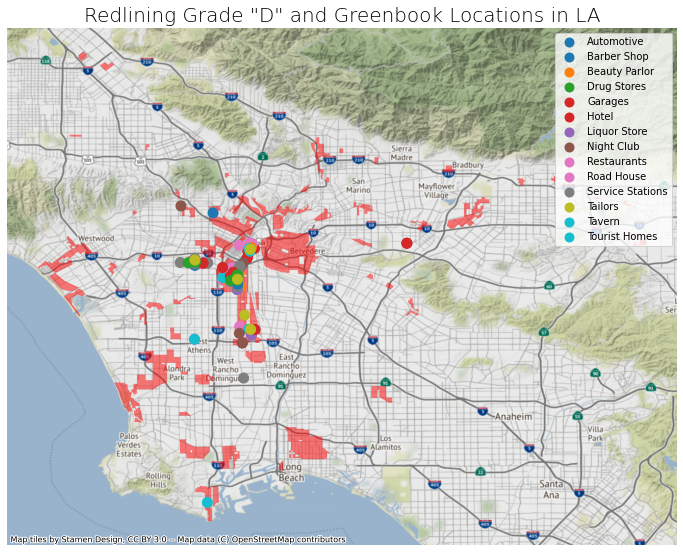

In [49]:
fig, ax = plt.subplots(figsize=(12,12))

# plot "D" redlined areas
D.plot(
        ax=ax,
        legend=True,
        color='red',
        alpha=0.5
         )

# add the greenbook locations
green.plot(
          ax=ax,
          column = 'Type',
          markersize = 100,
          legend=True)

# give it a title
ax.set_title('Redlining Grade "D" and Greenbook Locations in LA', fontdict={'fontsize': '20', 'fontweight' : '3'})

# add a basemap
cx.add_basemap(ax, crs=green.crs.to_string())

# turn the axes off
ax.set_axis_off();

<div class="alert alert-success"><h2>It's your turn!</h2>
    Create a map from a different redlining location and post your final output to the <a href="https://docs.google.com/document/d/1NYIlXmgWLL3nPDflwI-7PcjRjD95-1im5b8ecnvS5fw/edit?usp=sharing">class gallery</a>.
</div>

# Interactive maps

A fun teaser!

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(green,
                        lat=green.geometry.y,
                        lon=green.geometry.x,
                        hover_name="Type",
                        hover_data=['Type','Name','Street Address'],
                        color="Type",
                        zoom=10,
                        height=600,
                       mapbox_style='stamen-toner')
fig.update_traces(marker={'size': 15})
fig.show()